In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:

df=pd.read_csv('//kaggle//input//us-accidents//US_Accidents_March23.csv')

## **Data Understanding**


In [18]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [20]:


important_cols = [
    # Target
    "Severity",
    
    # Time
    "Start_Time",
    "Sunrise_Sunset",
    
    # Location
    "Start_Lat",
    "Start_Lng",
    "City",
    "State",
    
    # Weather
    "Temperature(F)",
    "Humidity(%)",
    "Visibility(mi)",
    "Wind_Speed(mph)",
    "Precipitation(in)",
    "Weather_Condition",
    
    # Road Features
    "Junction",
    "Traffic_Signal",
    "Crossing",
    "Stop",
    "Bump",
    "Railway",
    "Roundabout"
]

df = df[important_cols]

print("New Shape:", df.shape)
df.head()

New Shape: (7728394, 20)


,Severity,Start_Time,Sunrise_Sunset,Start_Lat,Start_Lng,City,State,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Junction,Traffic_Signal,Crossing,Stop,Bump,Railway,Roundabout
0,3,2016-02-08 05:46:00,Night,39.865147,-84.058723,Dayton,OH,36.9,91.0,10.0,NaN,0.02,Light Rain,False,False,False,False,False,False,False
1,2,2016-02-08 06:07:59,Night,39.928059,-82.831184,Reynoldsburg,OH,37.9,100.0,10.0,NaN,0.00,Light Rain,False,False,False,False,False,False,False
2,2,2016-02-08 06:49:27,Night,39.063148,-84.032608,Williamsburg,OH,36.0,100.0,10.0,3.5,NaN,Overcast,False,True,False,False,False,False,False
3,3,2016-02-08 07:23:34,Night,39.747753,-84.205582,Dayton,OH,35.1,96.0,9.0,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False
4,2,2016-02-08 07:39:07,Day,39.627781,-84.188354,Dayton,OH,36.0,89.0,6.0,3.5,NaN,Mostly Cloudy,False,True,False,False,False,False,False


In [21]:
df.info(),df.describe(),df.columns,df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   Sunrise_Sunset     object 
 3   Start_Lat          float64
 4   Start_Lng          float64
 5   City               object 
 6   State              object 
 7   Temperature(F)     float64
 8   Humidity(%)        float64
 9   Visibility(mi)     float64
 10  Wind_Speed(mph)    float64
 11  Precipitation(in)  float64
 12  Weather_Condition  object 
 13  Junction           bool   
 14  Traffic_Signal     bool   
 15  Crossing           bool   
 16  Stop               bool   
 17  Bump               bool   
 18  Railway            bool   
 19  Roundabout         bool   
dtypes: bool(7), float64(7), int64(1), object(5)
memory usage: 818.1+ MB


(None,
            Severity     Start_Lat     Start_Lng  Temperature(F)   Humidity(%)  \
 count  7.728394e+06  7.728394e+06  7.728394e+06    7.564541e+06  7.554250e+06   
 mean   2.212384e+00  3.620119e+01 -9.470255e+01    6.166329e+01  6.483104e+01   
 std    4.875313e-01  5.076079e+00  1.739176e+01    1.901365e+01  2.282097e+01   
 min    1.000000e+00  2.455480e+01 -1.246238e+02   -8.900000e+01  1.000000e+00   
 25%    2.000000e+00  3.339963e+01 -1.172194e+02    4.900000e+01  4.800000e+01   
 50%    2.000000e+00  3.582397e+01 -8.776662e+01    6.400000e+01  6.700000e+01   
 75%    2.000000e+00  4.008496e+01 -8.035368e+01    7.600000e+01  8.400000e+01   
 max    4.000000e+00  4.900220e+01 -6.711317e+01    2.070000e+02  1.000000e+02   
 
        Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
 count    7.551296e+06     7.157161e+06       5.524808e+06  
 mean     9.090376e+00     7.685490e+00       8.407210e-03  
 std      2.688316e+00     5.424983e+00       1.102246e-01  
 min     

In [22]:
df.isna().sum()

Severity                   0
Start_Time                 0
Sunrise_Sunset         23246
Start_Lat                  0
Start_Lng                  0
City                     253
State                      0
Temperature(F)        163853
Humidity(%)           174144
Visibility(mi)        177098
Wind_Speed(mph)       571233
Precipitation(in)    2203586
Weather_Condition     173459
Junction                   0
Traffic_Signal             0
Crossing                   0
Stop                       0
Bump                       0
Railway                    0
Roundabout                 0
dtype: int64

In [23]:
df.duplicated().sum()


np.int64(374273)

## **Data Cleaning**

In [24]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [25]:
df["Precipitation(in)"] = df["Precipitation(in)"].fillna(0)
df["Wind_Speed(mph)"] = df["Wind_Speed(mph)"].fillna(
    df["Wind_Speed(mph)"].median()
)
weather_cols = ["Temperature(F)", "Humidity(%)", "Visibility(mi)"]

for col in weather_cols:
    df[col] = df[col].fillna(df[col].median())


df["Weather_Condition"] = df["Weather_Condition"].fillna("Unknown")
df["Sunrise_Sunset"] = df["Sunrise_Sunset"].fillna("Unknown")
df["City"] = df["City"].fillna("Unknown")


In [26]:
df['Start_Time']=pd.to_datetime(df['Start_Time'],errors='coerce')
df = df.dropna(subset=["Start_Time"])

In [27]:
df["Hour"] = df["Start_Time"].dt.hour
df["Day"] = df["Start_Time"].dt.day
df["Month"] = df["Start_Time"].dt.month
df["Day_of_Week"] = df["Start_Time"].dt.day_name()

In [28]:
df["Severity"].value_counts(normalize=True) * 100

Severity
2    76.903668
3    19.432912
4     2.693244
1     0.970175
Name: proportion, dtype: float64

In [29]:
df = df[df["Visibility(mi)"] >= 0]
df = df[df["Wind_Speed(mph)"] >= 0]
df = df[df["Temperature(F)"] > -50]   # unrealistic threshold

In [30]:
df.isna().sum()

Severity             0
Start_Time           0
Sunrise_Sunset       0
Start_Lat            0
Start_Lng            0
City                 0
State                0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Junction             0
Traffic_Signal       0
Crossing             0
Stop                 0
Bump                 0
Railway              0
Roundabout           0
Hour                 0
Day                  0
Month                0
Day_of_Week          0
dtype: int64

## **Exploratory Data Analysis**

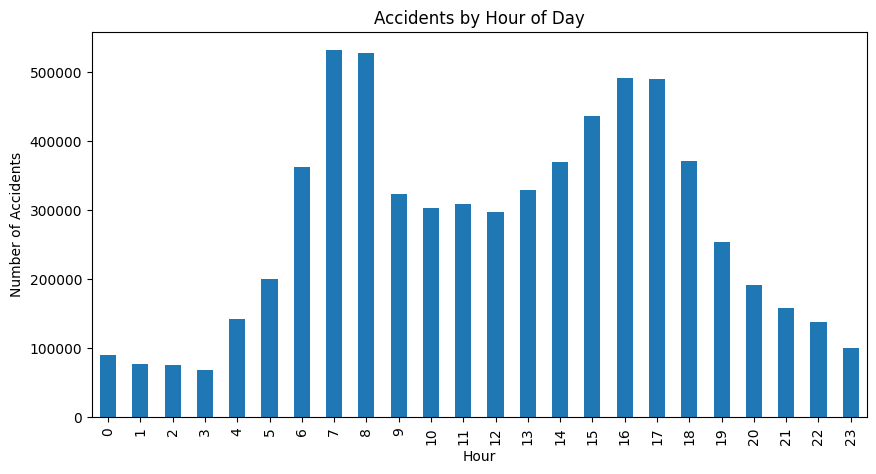

In [31]:
hour_counts=df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
hour_counts.plot(kind='bar')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

# insights :6-9 accidents peak in the morning and 3-6 accidents peak in the evening, accidents decline in the  night

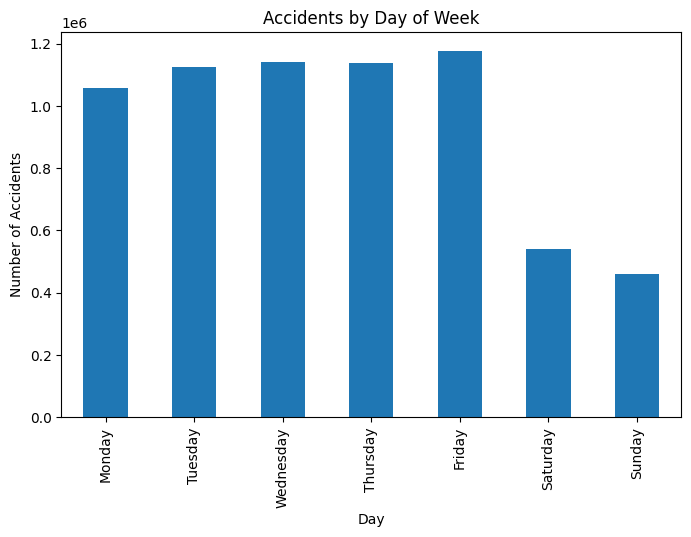

In [32]:
day_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
day_counts=df['Day_of_Week'].value_counts().reindex(day_order)

plt.figure(figsize=(8,5))
day_counts.plot(kind='bar')
plt.title('Accidents by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()

# Insights : All the week days (monday to friday) accidents peaks while on weekends, accidents doesn't occurs
# * Friday has highest numbers of accidents, and monday has lowest in the weekdays

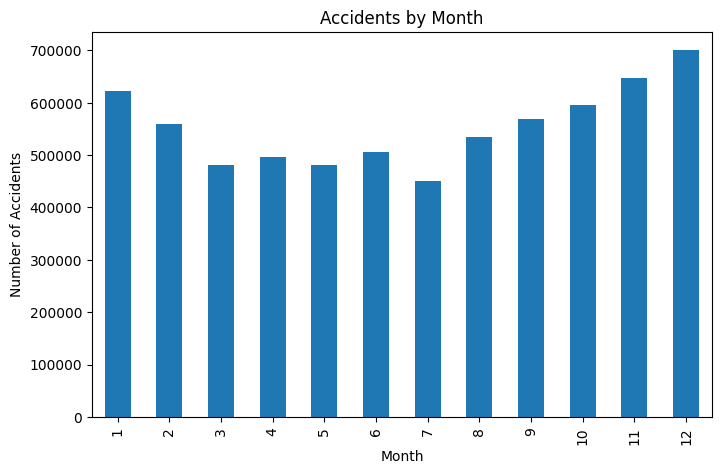

In [33]:
month_counts=df['Month'].value_counts().sort_index()
plt.figure(figsize=(8,5))
month_counts.plot(kind='bar')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

# Insights : in the winter (oct - Feb) accidents graph spikes, while in summer it declines 

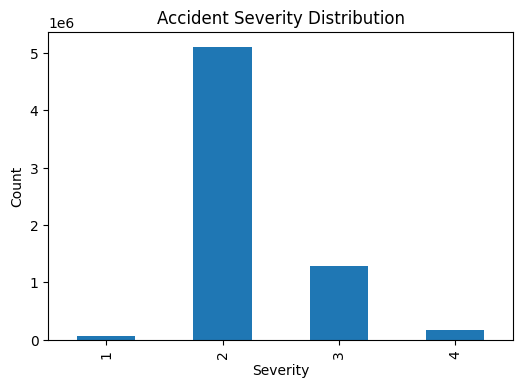

In [35]:
severity_counts=df['Severity'].value_counts().sort_index()


plt.figure(figsize=(6,4))
severity_counts.plot(kind="bar")
plt.title("Accident Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()


# Insights : 2 is dominant severity, then 3 then 4 follwing 1


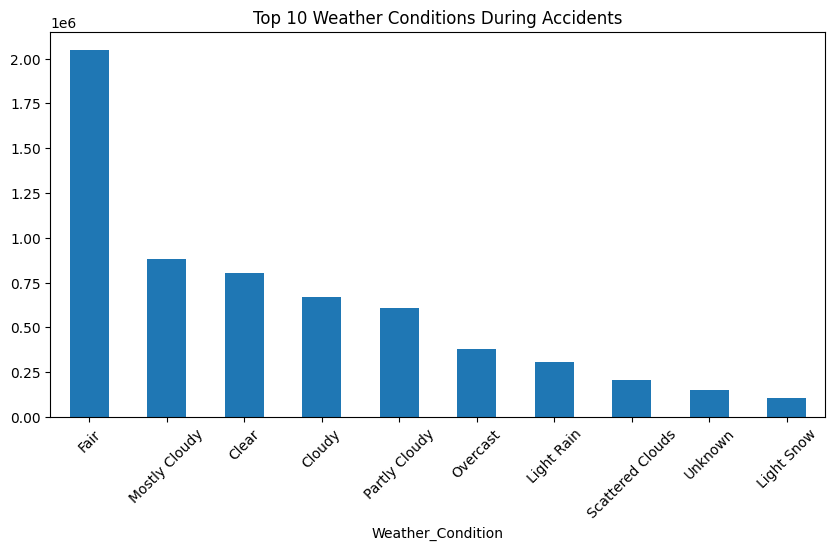

In [36]:
top_weather=df["Weather_Condition"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_weather.plot(kind="bar")
plt.title("Top 10 Weather Conditions During Accidents")
plt.xticks(rotation=45)
plt.show()

# insights : Fair weather has hightest numbers of accidents occured following  Mostly cloudy and clear and then cloudy and partially cloudy 

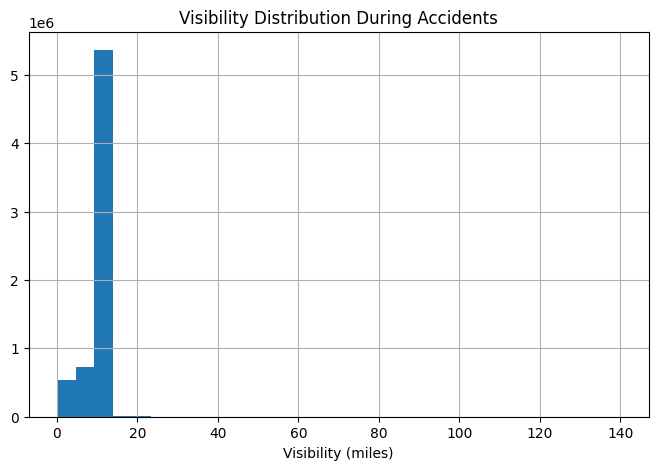

In [37]:
plt.figure(figsize=(8,5))
df["Visibility(mi)"].hist(bins=30)
plt.title("Visibility Distribution During Accidents")
plt.xlabel("Visibility (miles)")
plt.show()

# insights : accidents happens in low visiblity

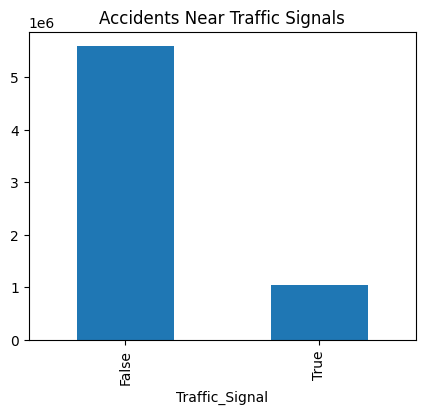

In [38]:
signal_counts=df["Traffic_Signal"].value_counts()

plt.figure(figsize=(5,4))
signal_counts.plot(kind="bar")
plt.title("Accidents Near Traffic Signals")
plt.show()

# Insights : Majority of accidents doesn't happen near traffic signals

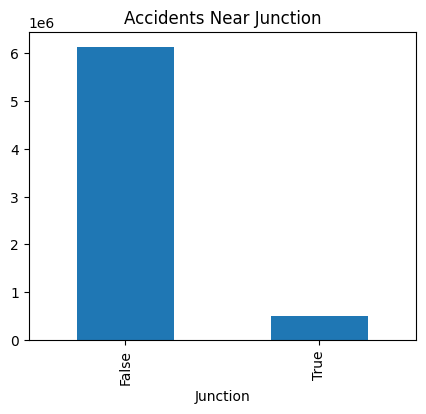

In [39]:
junction_counts=df["Junction"].value_counts()

plt.figure(figsize=(5,4))
signal_counts.plot(kind="bar")
plt.title("Accidents Near Junction")
plt.show()

# Insights : Majority of accidents doesn't happen near junction


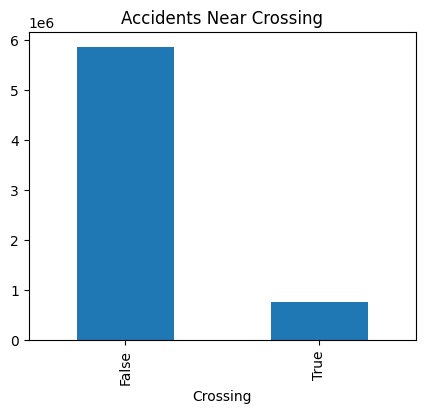

In [40]:
crossing_counts=df["Crossing"].value_counts()

plt.figure(figsize=(5,4))
signal_counts.plot(kind="bar")
plt.title("Accidents Near Crossing")
plt.show()

# Insights : Majority of accidents doesn't happen near crossing


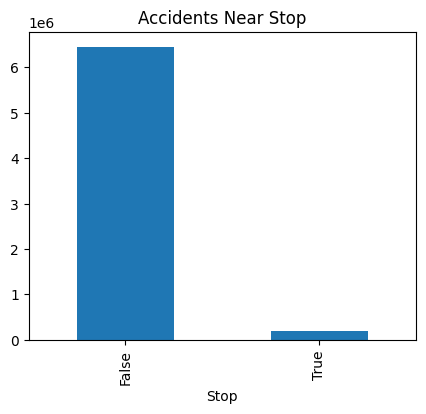

In [41]:
stop_counts=df["Stop"].value_counts()

plt.figure(figsize=(5,4))
signal_counts.plot(kind="bar")
plt.title("Accidents Near Stop")
plt.show()


# Insights : Majority of accidents doesn't happen near stop


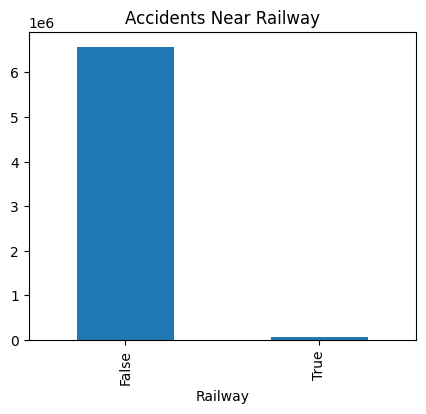

In [42]:
railway_counts=df["Railway"].value_counts()

plt.figure(figsize=(5,4))
signal_counts.plot(kind="bar")
plt.title("Accidents Near Railway")
plt.show()

# Insights : Majority of accidents doesn't happen near railway


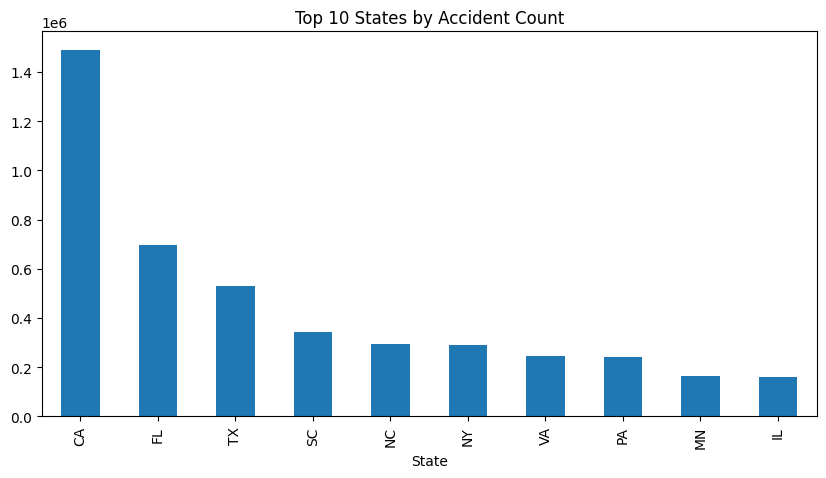

In [43]:
top_states=df["State"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_states.plot(kind="bar")
plt.title("Top 10 States by Accident Count")
plt.show()

# CA, FL and TX are top 3 states in which accidents happens

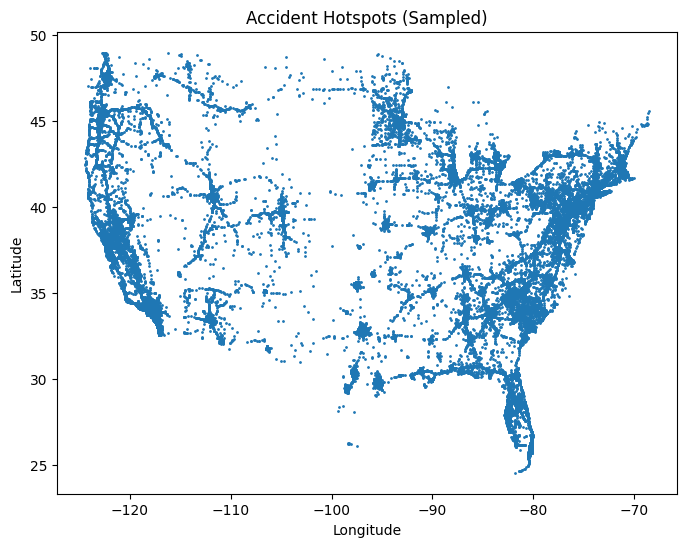

In [44]:
sample_df=df.sample(100000)

plt.figure(figsize=(8,6))
plt.scatter(sample_df["Start_Lng"], sample_df["Start_Lat"], s=1)
plt.title("Accident Hotspots (Sampled)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

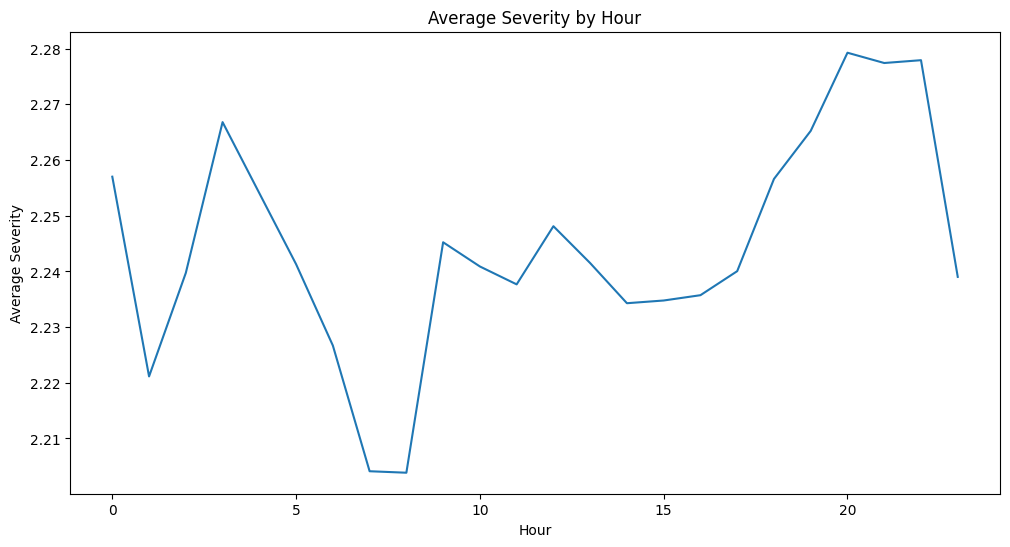

In [46]:
severity_hour=df.groupby("Hour")["Severity"].mean()

plt.figure(figsize=(12,6))
severity_hour.plot(kind="line")
plt.title("Average Severity by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Severity")
plt.show()

# late night avg severity spikes 

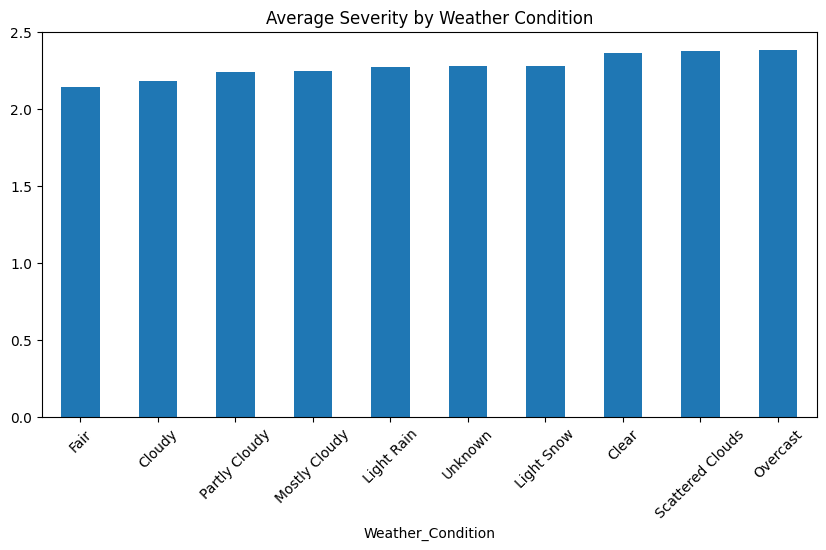

In [47]:
top_weather=df["Weather_Condition"].value_counts().head(10).index

severity_weather = df[df["Weather_Condition"].isin(top_weather)] \
    .groupby("Weather_Condition")["Severity"].mean() \
    .sort_values()

plt.figure(figsize=(10,5))
severity_weather.plot(kind="bar")
plt.title("Average Severity by Weather Condition")
plt.xticks(rotation=45)
plt.show()

# overcast, scattered clouds and clear are top 3 severe weather conditions

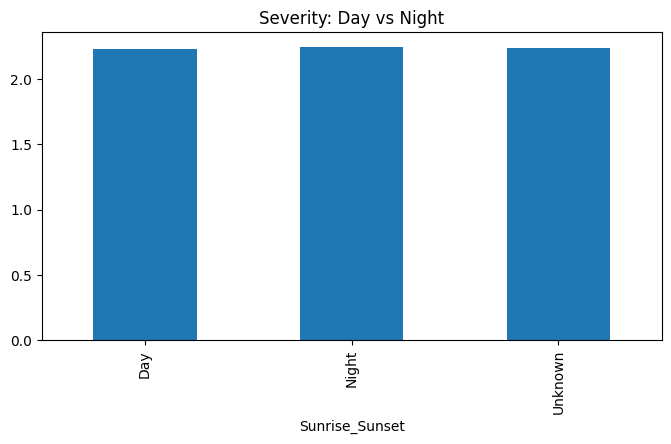

In [49]:
severity_day_night=df.groupby("Sunrise_Sunset")["Severity"].mean()

plt.figure(figsize=(8,4))
severity_day_night.plot(kind="bar")
plt.title("Severity: Day vs Night")
plt.show()

# severity Day vs Night graph is balanced

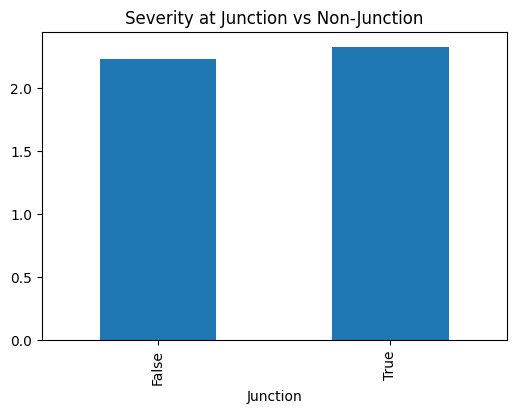

In [50]:
junction_severity=df.groupby("Junction")["Severity"].mean()

plt.figure(figsize=(6,4))
junction_severity.plot(kind="bar")
plt.title("Severity at Junction vs Non-Junction")
plt.show()

# 

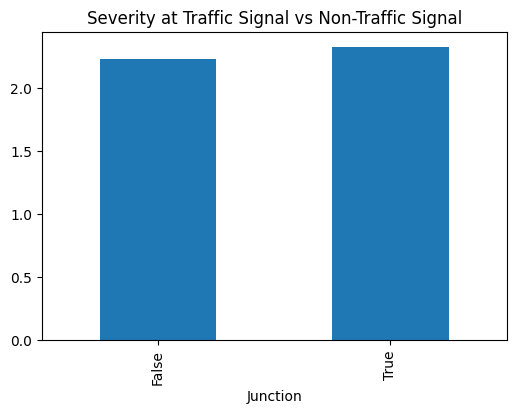

In [51]:
signal_severity=df.groupby("Traffic_Signal")["Severity"].mean()

plt.figure(figsize=(6,4))
junction_severity.plot(kind="bar")
plt.title("Severity at Traffic Signal vs Non-Traffic Signal")
plt.show()



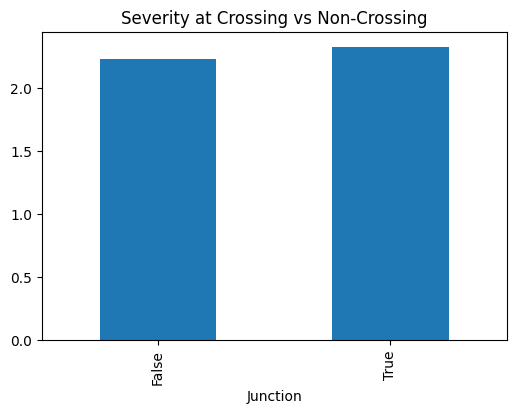

In [52]:
crossing_severity=df.groupby("Crossing")["Severity"].mean()

plt.figure(figsize=(6,4))
junction_severity.plot(kind="bar")
plt.title("Severity at Crossing vs Non-Crossing")
plt.show()


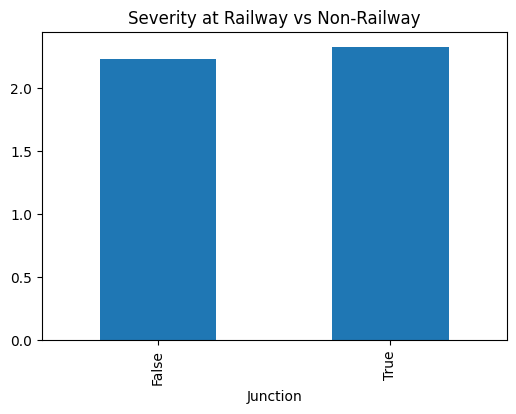

In [53]:
railway_severity=df.groupby("Railway")["Severity"].mean()

plt.figure(figsize=(6,4))
junction_severity.plot(kind="bar")
plt.title("Severity at Railway vs Non-Railway")
plt.show()


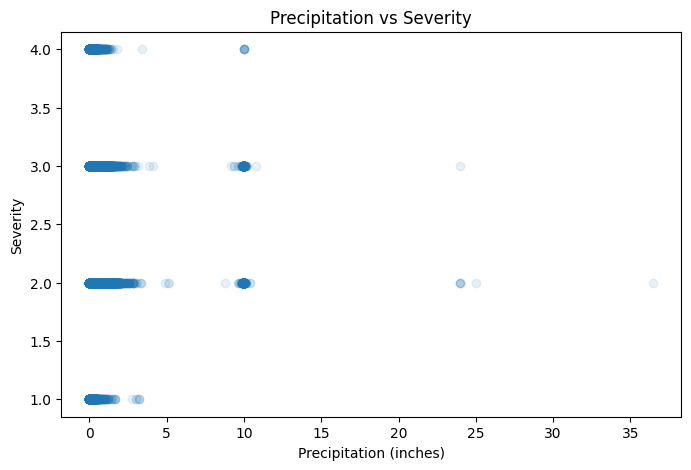

In [54]:
plt.figure(figsize=(8,5))
plt.scatter(df["Precipitation(in)"], df["Severity"], alpha=0.1)
plt.title("Precipitation vs Severity")
plt.xlabel("Precipitation (inches)")
plt.ylabel("Severity")
plt.show()



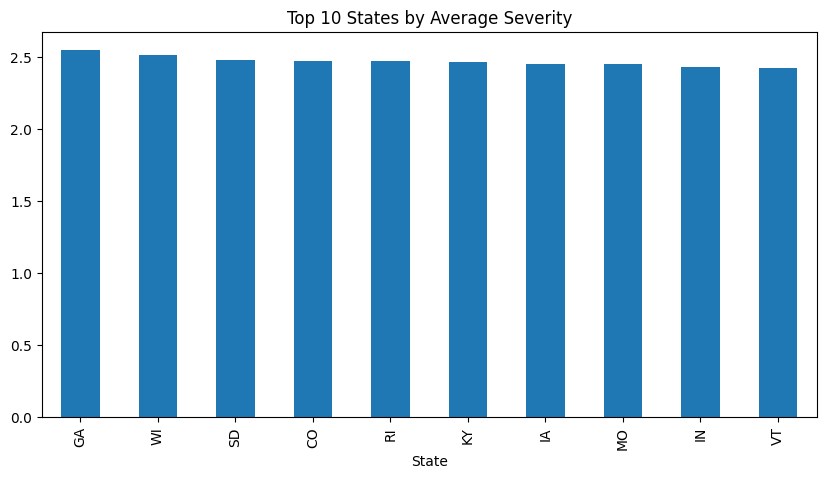

In [55]:
state_severity=df.groupby("State")["Severity"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
state_severity.plot(kind="bar")
plt.title("Top 10 States by Average Severity")
plt.show()

---


# 🚦 Traffic Accident Data Analysis Report

**Dataset:** US Accidents (7M+ records)
**Objective:** Analyze traffic accident data to identify patterns related to time, weather, road conditions, and geographic hotspots.

---

# 1️⃣ Data Understanding

The dataset originally contained:

* 7.7+ million accident records
* 46 columns including location, weather, time, and road features

For this project, relevant columns were selected focusing on:

* **Time:** Start_Time
* **Location:** Start_Lat, Start_Lng, City, State
* **Weather:** Temperature, Humidity, Visibility, Wind Speed, Precipitation, Weather Condition
* **Road Conditions:** Junction, Traffic Signal, Crossing, Stop, Railway
* **Target Variable:** Severity

This helped narrow the dataset to meaningful features aligned with the project objective.

---

# 2️⃣ Data Cleaning & Preprocessing

The following steps were performed:

### ✔ Duplicate Removal

* 387,848 duplicate records were identified and removed.
* This prevented inflated accident counts.

### ✔ Missing Value Handling

* Invalid time values (~700k rows) were removed since time-based analysis was central.
* Weather numerical columns were filled using median values.
* Precipitation missing values were replaced with 0.
* Categorical missing values were filled with "Unknown".

### ✔ Feature Engineering

New time-based features were created:

* Hour
* Day
* Month
* Day_of_Week

The dataset became fully clean and analysis-ready.

---

# 3️⃣ Exploratory Data Analysis (EDA)

The dataset was analyzed across multiple dimensions:

* Time of day
* Day of week
* Seasonal trends
* Weather conditions
* Road features
* Geographic distribution
* Severity patterns

---

# 4️⃣ Key Findings & Insights

## ⏰ Time-Based Patterns

* Accidents peak between **6 AM – 9 AM** (morning rush hour).
* Another peak occurs between **3 PM – 6 PM** (evening rush hour).
* Accidents decline during late night hours.
* However, **average severity increases late at night**, indicating fewer but more serious accidents.

---

## 📅 Weekly Trends

* Accidents are highest on weekdays (Monday–Friday).
* Very low accident frequency on weekends.
* Among weekdays:

  * **Friday has the highest accident count**
  * **Monday has the lowest**

This indicates strong correlation with workday commuting.

---

## 🌤 Seasonal Trends

* Accident frequency spikes during **Winter months (October – February)**.
* Accidents decline during Summer months.

This suggests weather-related and seasonal driving conditions influence accident frequency.

---

## 🚑 Severity Distribution

* Severity level 2 is dominant.
* Followed by Severity 3.
* Then Severity 4.
* Severity 1 is least frequent.

This indicates most accidents are moderate in impact.

---

## 🌦 Weather Impact

* Highest accident counts occur during:

  * Fair weather
  * Mostly cloudy
  * Clear
  * Cloudy
  * Partially cloudy

This suggests most accidents occur during normal weather — likely because driving activity is highest then.

However:

* Severe accidents are more associated with:

  * Overcast
  * Scattered clouds
  * Clear conditions

* Accidents are more common in **low visibility conditions**, indicating visibility plays a critical role.

---

## 🛣 Road Feature Analysis

Majority of accidents:

* Do NOT occur near traffic signals
* Do NOT occur near junctions
* Do NOT occur near crossings
* Do NOT occur near stop signs
* Do NOT occur near railway crossings

This suggests many accidents may occur on open roads or highways rather than controlled intersections.

---

## 📍 Geographic Hotspots

Top 3 states with highest accident counts:

1. California (CA)
2. Florida (FL)
3. Texas (TX)

These states have large populations and extensive road networks, contributing to higher accident frequency.

---

## 🌙 Day vs Night Severity

* Overall severity distribution is balanced between day and night.
* However, average severity slightly increases late at night.

This suggests:
Fewer accidents at night, but when they occur, they are more serious.

---

# 5️⃣ Overall Conclusions

From this analysis:

* Rush hours are high-risk periods.
* Winter months increase accident frequency.
* Low visibility significantly contributes to accidents.
* Most accidents are moderate severity.
* High-population states show higher accident frequency.
* Night driving may increase severity risk.

---

# 6️⃣ Suggestions & Recommendations

Based on findings:

### 🚦 1. Improve Rush Hour Traffic Management

* Increase traffic monitoring during 6–9 AM and 3–6 PM.
* Implement better signal timing in high-density areas.

### 🌫 2. Focus on Visibility Improvements

* Improve street lighting in low-visibility zones.
* Encourage fog warning systems in high-risk regions.

### ❄ 3. Winter Safety Campaigns

* Launch winter driving awareness programs.
* Promote tire and vehicle maintenance during cold months.

### 🌙 4. Night Safety Enforcement

* Increase patrol and monitoring during late-night hours.
* Promote anti-drunk-driving campaigns.

### 🛣 5. Highway Monitoring

Since many accidents do not occur at controlled intersections:

* Focus monitoring on highways and open roads.
* Improve road signage and reflectors.

---

# 7️⃣ Final Statement

This project successfully analyzed over 7 million accident records to uncover meaningful patterns related to time, weather, road conditions, and geography.

The findings highlight how environmental conditions, commuting patterns, and seasonal changes influence traffic accident frequency and severity.

---

